In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel('Business Funding Data.csv.xlsx', sheet_name = 'Business Funding Data')

Saving Business Funding Data.csv.xlsx to Business Funding Data.csv (1).xlsx


In [ ]:
print (df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Website Domain             26 non-null     object 
 1   Effective date             6 non-null      object 
 2   Found At                   26 non-null     object 
 3   Financing Type             8 non-null      object 
 4   Financing Type Normalized  8 non-null      object 
 5   Categories                 26 non-null     object 
 6   Investors                  13 non-null     object 
 7   Investors Count            13 non-null     float64
 8   Amount                     26 non-null     object 
 9   Amount Normalized          26 non-null     int64  
 10  Source Urls                26 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.4+ KB
None


,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
0,trafigura.com,NaN,2024-03-14T01:00:00+01:00,NaN,NaN,[],NaN,NaN,$1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...
1,zenobe.com,NaN,2024-05-31T02:00:00+02:00,NaN,NaN,[],"avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,$522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...
2,zenobe.com,NaN,2024-07-24T02:00:00+02:00,NaN,NaN,"[""private_equity""]",NaN,NaN,£41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...
3,canva.com,NaN,2024-05-01T02:00:00+02:00,NaN,NaN,[],stackcapitalgroup.com,1.0,US$8 million,8000000,https://www.globenewswire.com/news-release/202...
4,fidelity.com,NaN,2024-04-11T02:00:00+02:00,NaN,NaN,[],chevychasetrust.com,1.0,$1.96 million,1960000,https://www.defenseworld.net/2024/04/11/chevy-...


In [ ]:
df.shape

(26, 11)

In [ ]:
df.isnull().sum()

,0
Website Domain,0
Effective date,20
Found At,0
Financing Type,18
Financing Type Normalized,18
Categories,0
Investors,13
Investors Count,13
Amount,0
Amount Normalized,0


# Observation from Data Exploration:
Dataset has 26 rows and 11 columns

Missing values in 'Effective date', 'Financing Type', 'Financing Type Normalized'.

'Amount' column uses mixed formats (e.g, $1.9b), but 'Amount Normalized' provides numeric amounts.

'Categories' is a string representation of a list.

'Investors' contains multiple values seperated by commas.

Dates are in ISO format but need conversion to datetime.

No unique ID column; duplicates possible.

In [ ]:
df['Investors Count'] = df['Investors Count'].fillna(0).astype(int)

# For 'Financing Type' and 'Financing Type Normalized', replace NaN with 'Unknown'
df['Financing Type'] = df['Financing Type'].fillna('Unknown')
df['Financing Type Normalized'] = df['Financing Type Normalized'].fillna('Unknown')
df['Effective date'] = df['Effective date'].fillna('Unknown')
df['Investors'] = df['Investors'].fillna('Unknown')

In [ ]:
df.head()

,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
0,trafigura.com,Unknown,2024-03-14T01:00:00+01:00,Unknown,Unknown,[],Unknown,0,$1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...
1,zenobe.com,Unknown,2024-05-31T02:00:00+02:00,Unknown,Unknown,[],"avivainvestors.com, lloydsbankinggroup.com, sa...",9,$522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...
2,zenobe.com,Unknown,2024-07-24T02:00:00+02:00,Unknown,Unknown,"[""private_equity""]",Unknown,0,£41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...
3,canva.com,Unknown,2024-05-01T02:00:00+02:00,Unknown,Unknown,[],stackcapitalgroup.com,1,US$8 million,8000000,https://www.globenewswire.com/news-release/202...
4,fidelity.com,Unknown,2024-04-11T02:00:00+02:00,Unknown,Unknown,[],chevychasetrust.com,1,$1.96 million,1960000,https://www.defenseworld.net/2024/04/11/chevy-...


In [ ]:
df.tail()

,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
21,claritisoftware.com,2024-06-26T02:00:00+02:00,2024-06-26T02:00:00+02:00,Unknown,Unknown,"[""private_equity""]",cibc.com,1,$10 million,10000000,https://www.marketscreener.com/quote/stock/CAN...
22,biointelligence.com,Unknown,2024-04-30T02:00:00+02:00,Seed,seed,"[""seed"", ""venture""]",Unknown,0,$5 million CAD,3653000,https://betakit.com/biointelligence-technologi...
23,gaiia.com,2024-06-27T02:00:00+02:00,2024-06-27T02:00:00+02:00,Series A,series_a,"[""series_a"", ""venture""]",inovia.vc,1,US$13.2M,13200000,https://financialpost.com/globe-newswire/gaiia...
24,sinnstudio.com,Unknown,2024-05-22T02:00:00+02:00,Unknown,Unknown,"[""private_equity"", ""venture""]",Unknown,0,$2.5M,2500000,https://www.finsmes.com/2024/05/sinn-studio-ra...
25,topicflow.com,Unknown,2024-06-25T02:00:00+02:00,Unknown,Unknown,[],Unknown,0,$2.5m,2500000,https://www.streetinsider.com/Accesswire/Topic...


In [ ]:
df['Effective date'] = pd.to_datetime(df['Effective date'], errors='coerce')
df['year'] = df['Effective date'].dt.year.fillna(0).astype(int)
df['month'] = df['Effective date'].dt.month.fillna(0).astype(int)

/tmp/ipython-input-3684574864.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Effective date'] = pd.to_datetime(df['Effective date'], errors='coerce')


In [ ]:
df['Categories'] = df['Categories'].str.replace(r'[\[\]\"]', '', regex=True).str.replace('_', ' ')


In [ ]:
investors_df = df.copy()
investors_df['Investors'] = investors_df['Investors'].str.split(', ')
investors_df = investors_df.explode('Investors')

top_investors = investors_df.groupby('Investors')['Amount Normalized'].sum().sort_values(ascending=False)

print("Top Investors and their Total Investment Amounts:")
display(top_investors.head(10))

Top Investors and their Total Investment Amounts:


,Amount Normalized
Investors,
Unknown,2710793000
surocap.com,2000000000
cibc.com,532700000
avivainvestors.com,522700000
natwest.us,522700000
lloydsbankinggroup.com,522700000
mufg.jp,522700000
santander.co.uk,522700000
rabobank.com,522700000


In [ ]:
df['Investors'] = df['Investors'].fillna('None')

In [ ]:
df['Amount'] = df['Amount'].str.replace(r'[^\d\.\w\s]', '', regex=True)  # remove symbols


In [ ]:
df = df.drop_duplicates(subset=['Website Domain', 'Found At'])


In [ ]:
df.to_csv('Cleaned_Business_Funding_Data.csv', index=False)


In [ ]:
df = pd.read_csv('Cleaned_Business_Funding_Data.csv')

In [ ]:
df.head()

,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls,year,month
0,trafigura.com,NaN,2024-03-14T01:00:00+01:00,Unknown,Unknown,NaN,Unknown,0,1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...,0,0
1,zenobe.com,NaN,2024-05-31T02:00:00+02:00,Unknown,Unknown,NaN,"avivainvestors.com, lloydsbankinggroup.com, sa...",9,522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...,0,0
2,zenobe.com,NaN,2024-07-24T02:00:00+02:00,Unknown,Unknown,private equity,Unknown,0,41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...,0,0
3,canva.com,NaN,2024-05-01T02:00:00+02:00,Unknown,Unknown,NaN,stackcapitalgroup.com,1,US8 million,8000000,https://www.globenewswire.com/news-release/202...,0,0
4,fidelity.com,NaN,2024-04-11T02:00:00+02:00,Unknown,Unknown,NaN,chevychasetrust.com,1,1.96 million,1960000,https://www.defenseworld.net/2024/04/11/chevy-...,0,0


In [ ]:
df.tail()

,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls,year,month
20,topicflow.com,NaN,2024-06-25T02:00:00+02:00,Seed,seed,"seed, venture",Unknown,0,CAD2.5M,1823000,https://www.finsmes.com/2024/06/topicflow-rais...,0,0
21,claritisoftware.com,2024-06-26 02:00:00+02:00,2024-06-26T02:00:00+02:00,Unknown,Unknown,private equity,cibc.com,1,10 million,10000000,https://www.marketscreener.com/quote/stock/CAN...,2024,6
22,biointelligence.com,NaN,2024-04-30T02:00:00+02:00,Seed,seed,"seed, venture",Unknown,0,5 million CAD,3653000,https://betakit.com/biointelligence-technologi...,0,0
23,gaiia.com,2024-06-27 02:00:00+02:00,2024-06-27T02:00:00+02:00,Series A,series_a,"series a, venture",inovia.vc,1,US13.2M,13200000,https://financialpost.com/globe-newswire/gaiia...,2024,6
24,sinnstudio.com,NaN,2024-05-22T02:00:00+02:00,Unknown,Unknown,"private equity, venture",Unknown,0,2.5M,2500000,https://www.finsmes.com/2024/05/sinn-studio-ra...,0,0


In [ ]:
df['Effective date'] = df['Effective date'].fillna('Not Available')

In [ ]:
df['Categories'] = df['Categories'].fillna('Not Available')

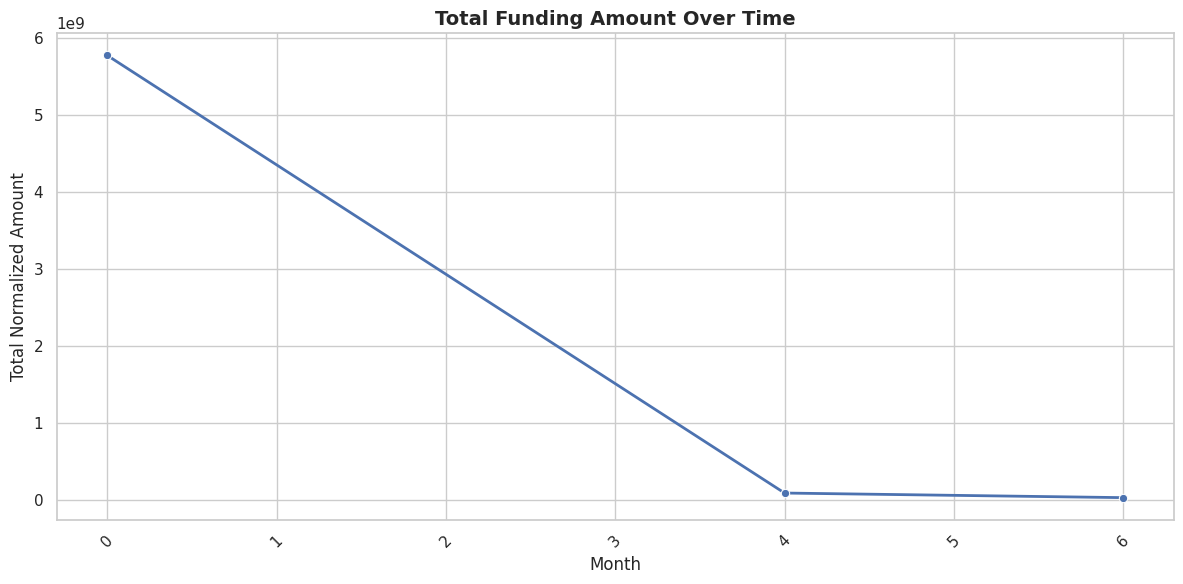

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

monthly_data = df.groupby('month')['Amount Normalized'].sum().reset_index()
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='month', y='Amount Normalized', marker='o', linewidth=2)

plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Normalized Amount', fontsize=12)
plt.title('Total Funding Amount Over Time', fontsize=14, fontweight='bold')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

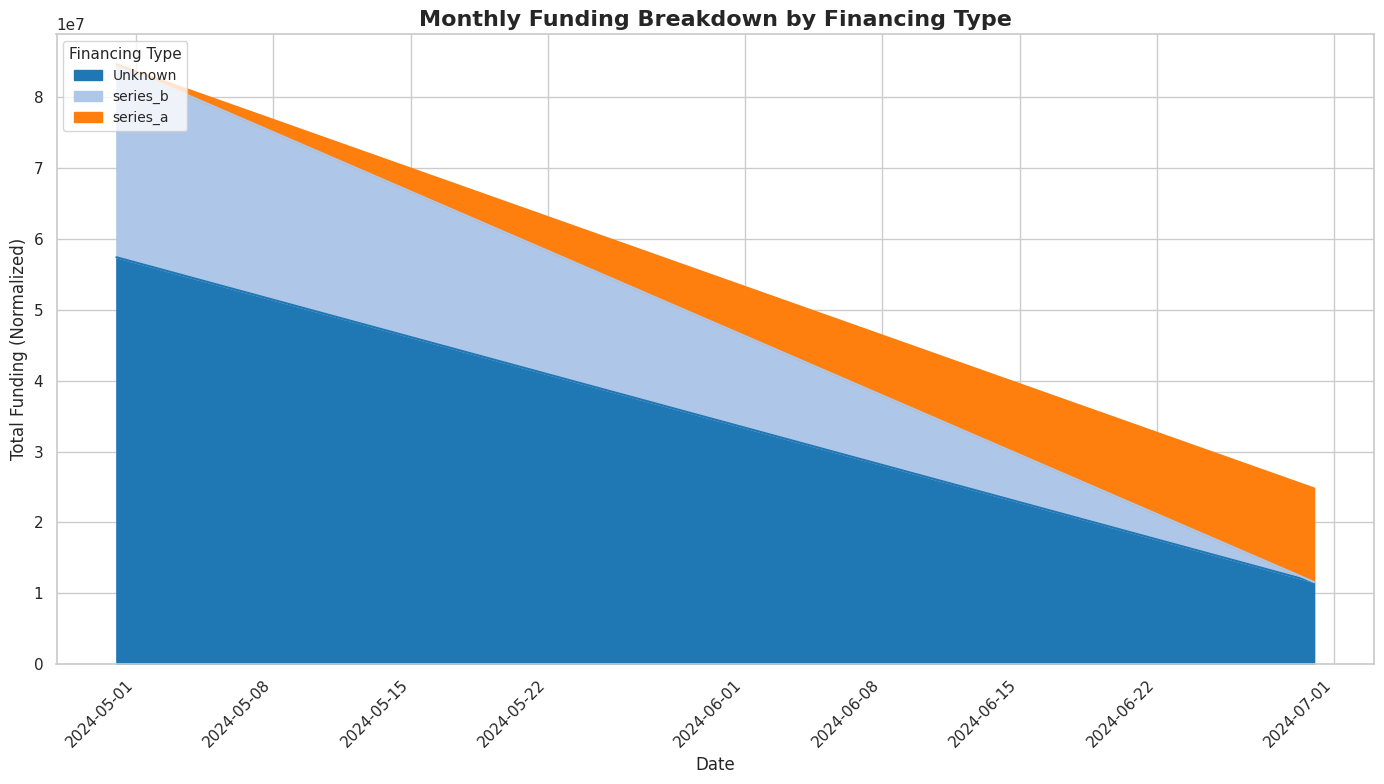

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['Effective date'] = pd.to_datetime(df['Effective date'], errors='coerce')

monthly_data = df.groupby([
    pd.Grouper(key='Effective date', freq='ME'),
    'Financing Type Normalized'
])['Amount Normalized'].sum().unstack(fill_value=0)

sns.set_style("whitegrid")
palette = sns.color_palette("tab20", n_colors=len(monthly_data.columns))

fig, ax = plt.subplots(figsize=(14, 8))
monthly_data.plot.area(stacked=True, ax=ax, color=palette)

ax.set_title('Monthly Funding Breakdown by Financing Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Funding (Normalized)', fontsize=12)
ax.legend(title='Financing Type', loc='upper left', fontsize=10, title_fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1853477145.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_investors, x='Amount Normalized', y='Investors', palette='viridis')


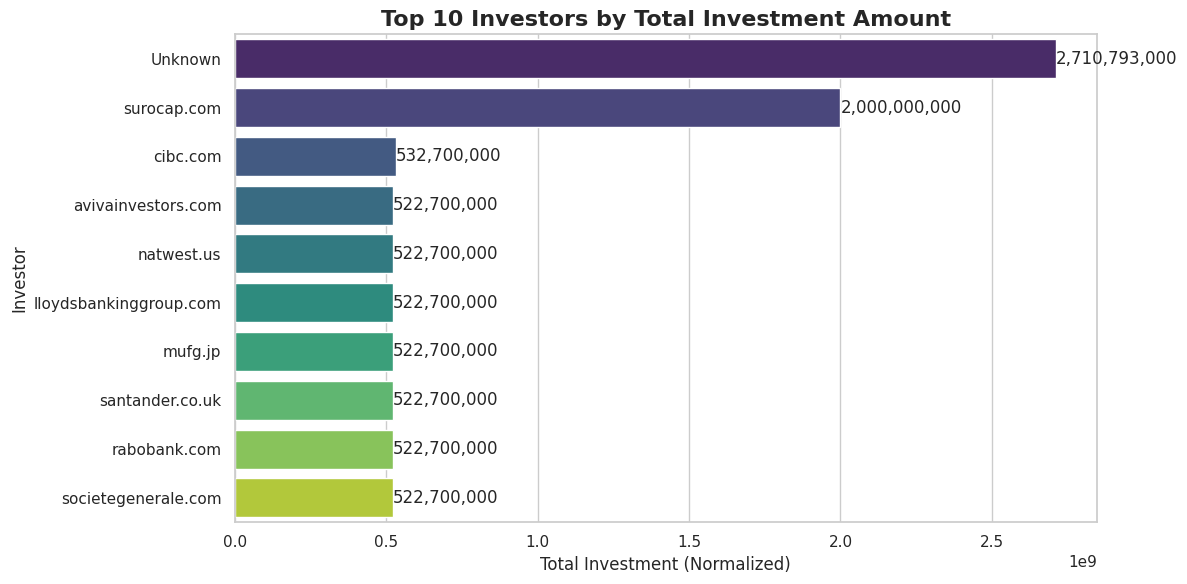

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_investors = top_investors.head(10).reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_investors, x='Amount Normalized', y='Investors', palette='viridis')

plt.title('Top 10 Investors by Total Investment Amount', fontsize=16, fontweight='bold')
plt.xlabel('Total Investment (Normalized)', fontsize=12)
plt.ylabel('Investor', fontsize=12)

for index, value in enumerate(top_10_investors['Amount Normalized']):
    plt.text(value, index, f'{value:,.0f}', va='center')

plt.tight_layout()
plt.show()